# Notebook 5 - County Level Analysis

ADD DESCRIPTION

Table 1


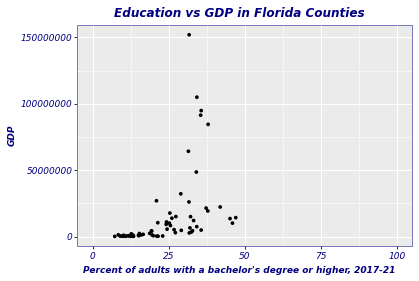

<ggplot: (134214682049)>

In [2]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict




import pandas as pd


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



FL_dataframe = new_df[new_df['State'] == 'FL']
FL_County_GDP = state_dict['Florida']


florida_dataframe = pd.DataFrame.from_dict(FL_County_GDP, orient='index' )

florida_dataframe = florida_dataframe.rename(columns={florida_dataframe.columns[0]: "GDP"})






# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in FL_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
florida_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
florida_dataframe



from plotnine import *



ggplot(florida_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.5, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in Florida Counties") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))

Table 1


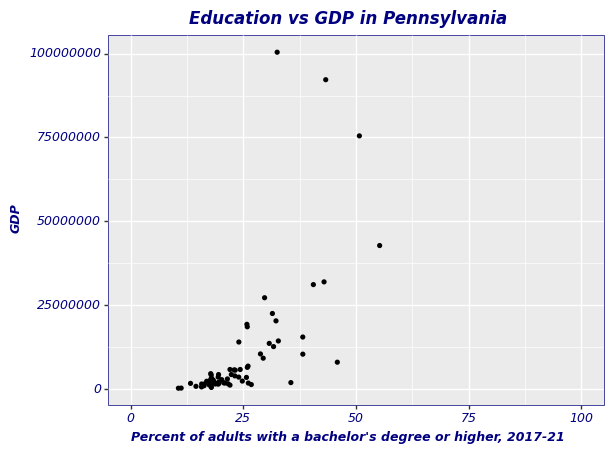

<ggplot: (134216906222)>

In [3]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict




import pandas as pd


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



PA_dataframe = new_df[new_df['State'] == 'PA']
PA_County_GDP = state_dict['Pennsylvania']


penn_dataframe = pd.DataFrame.from_dict(PA_County_GDP, orient='index' )

penn_dataframe = penn_dataframe.rename(columns={penn_dataframe.columns[0]: "GDP"})




# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in PA_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
penn_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
penn_dataframe



from plotnine import *



ggplot(penn_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.5, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in Pennsylvania") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))

In [1]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict




import pandas as pd


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



IL_dataframe = new_df[new_df['State'] == 'IL']
IL_County_GDP = state_dict['Illinois']


illinois_dataframe = pd.DataFrame.from_dict(IL_County_GDP, orient='index' )

illinois_dataframe = illinois_dataframe.rename(columns={illinois_dataframe.columns[0]: "GDP"})




# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in IL_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
illinois_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
illinois_dataframe



from plotnine import *



ggplot(illinois_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.9, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in Illinois") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))

KeyError: 'StateName'

Table 1


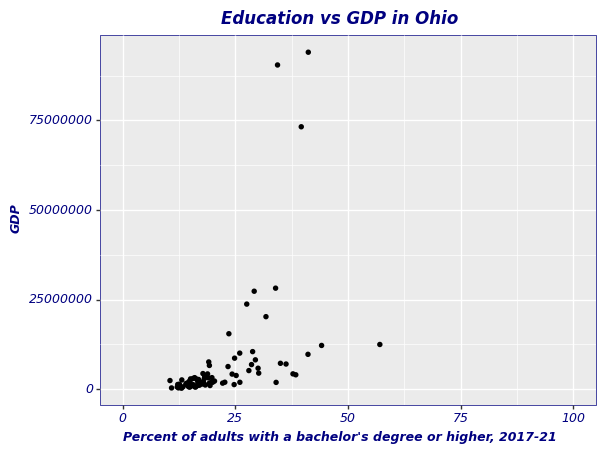

<ggplot: (134217072165)>

In [5]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict




import pandas as pd


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



OH_dataframe = new_df[new_df['State'] == 'OH']
OH_County_GDP = state_dict['Ohio']


ohio_dataframe = pd.DataFrame.from_dict(OH_County_GDP, orient='index' )

ohio_dataframe = ohio_dataframe.rename(columns={ohio_dataframe.columns[0]: "GDP"})




# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in OH_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
ohio_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
ohio_dataframe



from plotnine import *



ggplot(ohio_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.6, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in Ohio") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))

In [6]:

import pandas as pd

# Read in the Excel document
df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Group the data by state
state_groups = df.groupby('StateName')

# Create a dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict

state_dict




import pandas as pd


dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

# Select the desired columns
cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



VT_dataframe = new_df[new_df['State'] == 'VT']
VT_County_GDP = state_dict['Vermont']


vermont_dataframe = pd.DataFrame.from_dict(VT_County_GDP, orient='index' )

vermont_dataframe = vermont_dataframe.rename(columns={vermont_dataframe.columns[0]: "GDP"})




# create an empty list to store the values from the 'Age' column
percent_list = []

# loop through the 'Age' column and add each value to the list
for x in VT_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
vermont_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
vermont_dataframe



from plotnine import *



ggplot(vermont_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + geom_point(size = 0.6, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in Vermont") + theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + scale_x_continuous(limits=(0, 100)) + theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))

Table 1


KeyError: 'Vermont'

Table 1


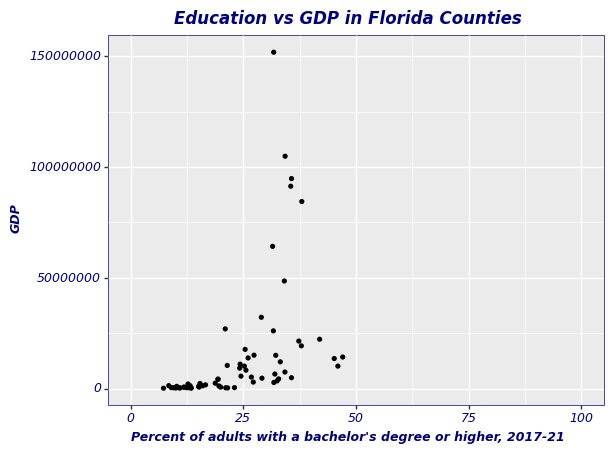

<ggplot: (134217119606)>

In [7]:

import pandas as pd


df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Grouping the data by state
state_groups = df.groupby('StateName')

# New dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict


    

dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df



FL_dataframe = new_df[new_df['State'] == 'FL']
FL_County_GDP = state_dict['Florida']


florida_dataframe = pd.DataFrame.from_dict(FL_County_GDP, orient='index' )

florida_dataframe = florida_dataframe.rename(columns={florida_dataframe.columns[0]: "GDP"})



percent_list = []

# loop through the 'Age' column and add each value to the list
for x in FL_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
florida_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
florida_dataframe




ggplot(florida_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + \
          geom_point(size = 0.5, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in Florida Counties") + \
          theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))

Table 1


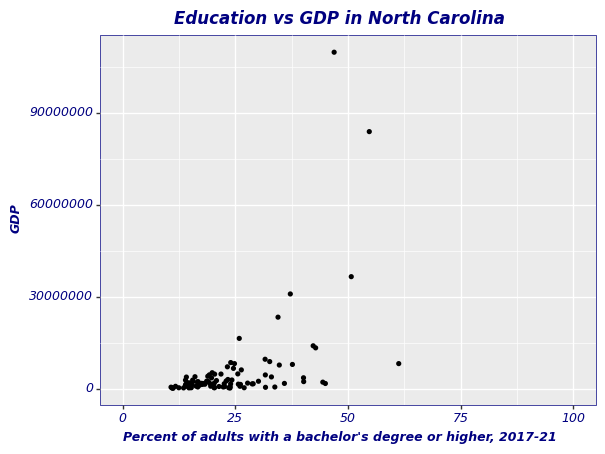

<ggplot: (134208081800)>

In [9]:

import pandas as pd


df = pd.read_excel('~/Downloads/GDP_County_2021_NotPerCapita.xlsx', sheet_name='Table 1')

# Grouping the data by state
state_groups = df.groupby('StateName')

# New dictionary for every state
state_dict = {}
for state, state_data in state_groups:
    county_dict = {}
    for i, row in state_data.iterrows():
        county_dict[row['CountyName']] = row['GDP']
    state_dict[state] = county_dict


    

dataframe = pd.read_excel('~/Downloads/Education.xlsx', sheet_name='Education 1970 to 2021')

cols_to_keep = [0, 1, 2, 54]
new_df = dataframe.iloc[:, cols_to_keep]


new_df = new_df.rename(columns={new_df.columns[-1]: "Percent of adults with a bachelor's degree or higher, 2017-21"})
new_df = new_df.rename(columns={new_df.columns[-2]: "County"})
new_df = new_df.rename(columns={new_df.columns[-3]: "State"})
new_df


NC_dataframe = new_df[new_df['State'] == 'NC']
NC_County_GDP = state_dict['North Carolina']


ncarolina_dataframe = pd.DataFrame.from_dict(NC_County_GDP, orient='index' )

ncarolina_dataframe = ncarolina_dataframe.rename(columns={ncarolina_dataframe.columns[0]: "GDP"})



percent_list = []

# loop through the 'Age' column and add each value to the list
for x in NC_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"].iloc[1:]:
    percent_list.append(x)

# create a new DataFrame using the age_list
ncarolina_dataframe["Percent of adults with a bachelor's degree or higher, 2017-21"] = percent_list
ncarolina_dataframe




ggplot(ncarolina_dataframe, aes(x="Percent of adults with a bachelor's degree or higher, 2017-21", y="GDP")) + \
          geom_point(size = 0.5, color = 'black', stroke = 0.8) + ggtitle("Education vs GDP in North Carolina") + \
          theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'navy', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='navy', fill=None))